In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load data
df = pd.read_csv("D:/EDGE AI/Edge-AI-1/Data/cleaned_telemetry_data.csv")
features = ["temp", "humidity", "co", "lpg", "smoke"]
data = df[features].values

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps]) 
    return np.array(X), np.array(y)

TIME_STEPS = 10
X, y = create_sequences(data_scaled, TIME_STEPS)

# Split testing and training sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Implementing the LSTM model architecture
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=5)
])

model.compile(optimizer="adam", loss="mean_squared_error")

model.summary()

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.save("lstm_model.h5")


c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,805 (128.14 KB)

 Trainable params: 32,805 (128.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - loss: 0.0103 - val_loss: 0.0072
Epoch 2/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 0.0068 - val_loss: 0.0070
Epoch 3/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - loss: 0.0064 - val_loss: 0.0071
Epoch 4/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0063 - val_loss: 0.0068
Epoch 5/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 0.0063 - val_loss: 0.0067
Epoch 6/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0062 - val_loss: 0.0067
Epoch 7/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0062 - val_loss: 0.0066
Epoch 8/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 9/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 10/10
10130/10130 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 0.0061 - val_loss: 0.0066


2533/2533 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0060
Test Loss: 0.006565101444721222
2533/2533 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


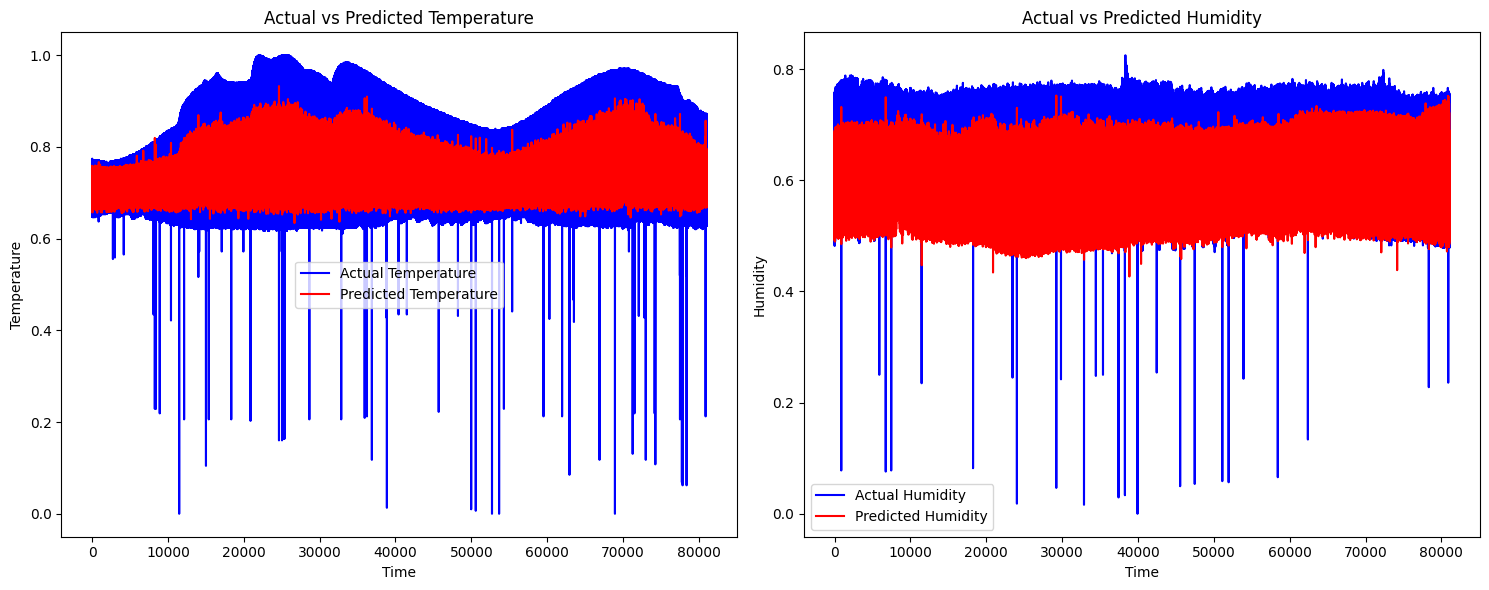

In [6]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

loaded_model = load_model("lstm_model.h5")

# Evaluating the model
test_loss = loaded_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
y_pred = loaded_model.predict(X_test)

# Inverse scaling for better predicitons
y_test_original = scaler.inverse_transform(y_test) 
y_pred_original = scaler.inverse_transform(y_pred)

# Humidity and Temperature Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Humidity - Actual vs Predicted Temperature
ax1.plot(y_test_original[:, 0], label="Actual Temperature", color='blue')  
ax1.plot(y_pred_original[:, 0], label="Predicted Temperature", color='red')
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature")
ax1.set_title("Actual vs Predicted Temperature")
ax1.legend()

# Humidity - Actual vs Predicted
ax2.plot(y_test_original[:, 1], label="Actual Humidity", color='blue') 
ax2.plot(y_pred_original[:, 1], label="Predicted Humidity", color='red') 
ax2.set_xlabel("Time")
ax2.set_ylabel("Humidity")
ax2.set_title("Actual vs Predicted Humidity")
ax2.legend()

# Show the plots
plt.tight_layout()
plt.show()
